In [1]:
import pandas as pd
import numpy as np
import sqlite3
from sqlalchemy import create_engine
from functools import reduce
import os

In [2]:
db_path = "../data/raw_data_project_m1.db"

conn_str = f'sqlite:///{db_path}'

engine = create_engine(conn_str)

In [3]:
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type = 'table'",engine)

,name
0,personal_info
1,country_info
2,career_info
3,poll_info


In [4]:
pd.read_sql_query("SELECT * FROM personal_info LIMIT 10", engine)

,uuid,age,gender,dem_has_children,age_group
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,61 years old,male,NO,40_65
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,57 years old,male,yES,40_65
2,83127080-da3d-0133-c74f-0a81e8b09a82,32 years old,male,nO,26_39
3,15626d40-db13-0133-ea5c-0a81e8b09a82,45 years old,Male,YES,40_65
4,24954a70-db98-0133-4a64-0a81e8b09a82,41 years old,Fem,yES,40_65
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,1990,FeMale,NO,26_39
6,b50dbb80-da53-0133-8956-0a81e8b09a82,1990,Fem,NO,26_39
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,47 years old,Male,NO,40_65
8,4fde2370-da48-0133-3a42-0a81e8b09a82,34 years old,FeMale,nO,26_39
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,1994,female,yES,juvenile


In [5]:
pd.read_sql_query("SELECT * FROM country_info LIMIT 10", engine)

,uuid,country_code,rural
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,countryside
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,urban
2,83127080-da3d-0133-c74f-0a81e8b09a82,AT,city
3,15626d40-db13-0133-ea5c-0a81e8b09a82,AT,Country
4,24954a70-db98-0133-4a64-0a81e8b09a82,AT,city
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,AT,countryside
6,b50dbb80-da53-0133-8956-0a81e8b09a82,AT,urban
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,AT,urban
8,4fde2370-da48-0133-3a42-0a81e8b09a82,AT,city
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,AT,urban


In [6]:
pd.read_sql_query("SELECT * FROM career_info LIMIT 10", engine)

,uuid,dem_education_level,dem_full_time_job,normalized_job_code
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,no,no,None
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,high,yes,861a9b9151e11362eb3c77ca914172d0
2,83127080-da3d-0133-c74f-0a81e8b09a82,None,no,None
3,15626d40-db13-0133-ea5c-0a81e8b09a82,high,yes,049a3f3a2b5f85cb2971ba77ad66e10c
4,24954a70-db98-0133-4a64-0a81e8b09a82,high,yes,f4b2fb1aa40f661488e2782b6d57ad2f
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,high,yes,27af8700f5577cec835acee2cb90a2ff
6,b50dbb80-da53-0133-8956-0a81e8b09a82,medium,no,None
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,medium,yes,c1b670eba9ccb65e7c99f7da116d5b9c
8,4fde2370-da48-0133-3a42-0a81e8b09a82,medium,yes,d71c4164c99a5f9bca773e755a72f40f
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,no,no,None


In [7]:
pd.read_sql_query("SELECT * FROM poll_info LIMIT 10", engine)

,uuid,question_bbi_2016wave4_basicincome_awareness,question_bbi_2016wave4_basicincome_vote,question_bbi_2016wave4_basicincome_effect,question_bbi_2016wave4_basicincome_argumentsfor,question_bbi_2016wave4_basicincome_argumentsagainst
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,I know something about it,I would not vote,None of the above,None of the above,None of the above
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,I understand it fully,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working
2,83127080-da3d-0133-c74f-0a81e8b09a82,I have heard just a little about it,I would not vote,‰Û_ gain additional skills,It creates more equality of opportunity,Foreigners might come to my country and take a...
3,15626d40-db13-0133-ea5c-0a81e8b09a82,I have heard just a little about it,I would probably vote for it,‰Û_ work less,It reduces anxiety about financing basic needs,None of the above
4,24954a70-db98-0133-4a64-0a81e8b09a82,I have heard just a little about it,I would probably vote for it,None of the above,It reduces anxiety about financing basic needs,It is impossible to finance | It might encoura...
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,I understand it fully,I would vote against it,A basic income would not affect my work choices,It encourages financial independence and self-...,It is impossible to finance | It might encoura...
6,b50dbb80-da53-0133-8956-0a81e8b09a82,I know something about it,I would probably vote for it,‰Û_ work as a freelancer,It reduces anxiety about financing basic needs,Foreigners might come to my country and take a...
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,I know something about it,I would probably vote for it,A basic income would not affect my work choices,It increases appreciation for household work a...,It might encourage people to stop working | Fo...
8,4fde2370-da48-0133-3a42-0a81e8b09a82,I have heard just a little about it,I would probably vote for it,None of the above,It creates more equality of opportunity | It r...,Foreigners might come to my country and take a...
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,I understand it fully,I would vote for it,‰Û_ do more volunteering work,"It increases solidarity, because it is funded ...",Foreigners might come to my country and take a...


In [8]:
table_query = """SELECT personal_info.uuid, country_info.country_code, 
career_info.normalized_job_code, 
personal_info.age
FROM personal_info
JOIN career_info ON personal_info.uuid = career_info.uuid
JOIN country_info ON personal_info.uuid = country_info.uuid
JOIN poll_info ON personal_info.uuid = poll_info.uuid
"""

df = pd.read_sql_query(table_query,engine)

df.head(10)

,uuid,country_code,normalized_job_code,age
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,None,61 years old
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,861a9b9151e11362eb3c77ca914172d0,57 years old
2,83127080-da3d-0133-c74f-0a81e8b09a82,AT,None,32 years old
3,15626d40-db13-0133-ea5c-0a81e8b09a82,AT,049a3f3a2b5f85cb2971ba77ad66e10c,45 years old
4,24954a70-db98-0133-4a64-0a81e8b09a82,AT,f4b2fb1aa40f661488e2782b6d57ad2f,41 years old
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,AT,27af8700f5577cec835acee2cb90a2ff,1990
6,b50dbb80-da53-0133-8956-0a81e8b09a82,AT,None,1990
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,AT,c1b670eba9ccb65e7c99f7da116d5b9c,47 years old
8,4fde2370-da48-0133-3a42-0a81e8b09a82,AT,d71c4164c99a5f9bca773e755a72f40f,34 years old
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,AT,None,1994


In [9]:
df.country_code.unique()

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR',
       'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL',
       'PL', 'PT', 'RO', 'SE', 'SI', 'SK'], dtype=object)

In [10]:
df.normalized_job_code.unique()

array([None, '861a9b9151e11362eb3c77ca914172d0',
       '049a3f3a2b5f85cb2971ba77ad66e10c',
       'f4b2fb1aa40f661488e2782b6d57ad2f',
       '27af8700f5577cec835acee2cb90a2ff',
       'c1b670eba9ccb65e7c99f7da116d5b9c',
       'd71c4164c99a5f9bca773e755a72f40f',
       '2ee80cf30e2483dfe0947adc0428f8c5',
       '897ef18a9321616495831a4b4b0c1bb2',
       'a003702c0cea282e17967772dd83de5e',
       '04c82eae29e1c4a30eac0710b74ab276',
       'fcaf4aac737e53ad24b9f32f08b8740f',
       '3833bd699e7afe4665b595f282da0387',
       '19e384e977796c25780d8c28b12089c4',
       '474b962c13632a04e42a546be4f11dbb',
       'dac2e921c1f887d9efc4c06fa33c1397',
       '996da29c84f5eed00da40c230f4c4078',
       'cc2b26cc436bea36bda3bdd7367c411a',
       '25fe195cbf915c0824fa6c44e6d0008c',
       '76385cb24e831b3364279b9de5641d8f',
       '16b67d7f57698455aefbc1ae1b358b50',
       'b24ece3300d2f8ab34f9553e531183d6',
       '5db2c8d6539f983e1ca3d7c5b939e190',
       '36675c937946c8a4fc5de7d0b4c850de',
     

In [11]:
df.age.unique()

array(['61 years old', '57 years old', '32 years old', '45 years old',
       '41 years old', '1990', '47 years old', '34 years old', '1994',
       '49 years old', '58 years old', '1991', '40 years old',
       '37 years old', '48 years old', '31 years old', '1999', '1989',
       '2001', '35 years old', '51 years old', '1988', '42 years old',
       '33 years old', '64 years old', '38 years old', '55 years old',
       '1992', '1993', '36 years old', '46 years old', '1998',
       '44 years old', '1996', '65 years old', '1995', '52 years old',
       '2002', '50 years old', '1997', '43 years old', '1987', '1986',
       '39 years old', '53 years old', '62 years old', '2000',
       '54 years old', '56 years old', '59 years old', '60 years old',
       '63 years old'], dtype=object)

In [12]:
df['age']

0       61 years old
1       57 years old
2       32 years old
3       45 years old
4       41 years old
            ...     
9644    37 years old
9645    53 years old
9646            1992
9647    47 years old
9648    51 years old
Name: age, Length: 9649, dtype: object

In [13]:
age_ok = []
for item in df['age']:
    if "years old" in item:
        age_ok.append(int(item[0:2]))
    elif len(item)>=4:
        age_ok.append(2016-int(item))
        
df["age"] = age_ok

#Now we need to update ages to 2020
df["age"] = df["age"]+4

In [14]:
df.head(10)

,uuid,country_code,normalized_job_code,age
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,None,65
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,861a9b9151e11362eb3c77ca914172d0,61
2,83127080-da3d-0133-c74f-0a81e8b09a82,AT,None,36
3,15626d40-db13-0133-ea5c-0a81e8b09a82,AT,049a3f3a2b5f85cb2971ba77ad66e10c,49
4,24954a70-db98-0133-4a64-0a81e8b09a82,AT,f4b2fb1aa40f661488e2782b6d57ad2f,45
5,28583060-dbe2-0133-ff9c-0a81e8b09a82,AT,27af8700f5577cec835acee2cb90a2ff,30
6,b50dbb80-da53-0133-8956-0a81e8b09a82,AT,None,30
7,dd743bb0-d9a5-0133-53b2-0a81e8b09a82,AT,c1b670eba9ccb65e7c99f7da116d5b9c,51
8,4fde2370-da48-0133-3a42-0a81e8b09a82,AT,d71c4164c99a5f9bca773e755a72f40f,38
9,9949c4c0-da5f-0133-c832-0a81e8b09a82,AT,None,26


## API

In [15]:
import requests

In [16]:
import json

In [17]:
jobs_api = []
job_codes = set(df["normalized_job_code"])

for i in job_codes:
    response = requests.get(f'http://api.dataatwork.org/v1/jobs/{i}')
    jobs_json = response.json()
    jobs_api.append(jobs_json)

In [18]:
jobs = pd.DataFrame(jobs_api)
jobs = jobs.rename(columns={"uuid": "normalized_job_code"})
df_jobs_api = jobs[["normalized_job_code", "title","normalized_job_title" ]]

df_jobs_api

,normalized_job_code,title,normalized_job_title
0,b36bc5f02fd641a126df999bcefa2777,Data Technician,data technician
1,b0fa6ede410f50b82ab74f5a705fe699,Analytical Data Miner,analytical data miner
2,58eaf730050d2e23c7361fbb782e30a2,Data Processing Mechanic,data processing mechanic
3,00bff17fca67555d8d86e8ead86dcd70,Database Analyst,database analyst
4,a2a9fbe67b4aa2b551ba0f3adac90a99,"Engineer, System Electronic Data Processing (E...",engineer system electronic data processing eng...
...,...,...,...
152,141ddda0f613da65a280521247de0e9f,Data Administrator,data administrator
153,096536ec43ce2a7de73031b271a1c132,Flight Data Technician,flight data technician
154,d63e35f948115e0c328a49db7bdb6e59,Data Control Clerk Supervisor,data control clerk supervisor
155,2f704538f6c9d6459a97314be98124e2,Data Collector,data collector


#### Merge API results with Data Frame

In [19]:
df_ok = pd.merge(df, df_jobs_api, how = "left", on= "normalized_job_code")

df_ok

,uuid,country_code,normalized_job_code,age,title,normalized_job_title
0,f6e7ee00-deac-0133-4de8-0a81e8b09a82,AT,None,65,NaN,NaN
1,54f0f1c0-dda1-0133-a559-0a81e8b09a82,AT,861a9b9151e11362eb3c77ca914172d0,61,Automatic Data Processing Planner,automatic data processing planner
2,83127080-da3d-0133-c74f-0a81e8b09a82,AT,None,36,NaN,NaN
3,15626d40-db13-0133-ea5c-0a81e8b09a82,AT,049a3f3a2b5f85cb2971ba77ad66e10c,49,Data Coordinator,data coordinator
4,24954a70-db98-0133-4a64-0a81e8b09a82,AT,f4b2fb1aa40f661488e2782b6d57ad2f,45,Database Developer,database developer
...,...,...,...,...,...,...
9644,7d1ac020-dcb4-0133-817a-0a81e8b09a82,SK,847165cfda6b1dc82ae22b967da8af2f,41,Data Warehouse Developer,data warehouse developer
9645,39f989f0-db52-0133-8482-0a81e8b09a82,SK,a4d5b8b38f9513825d0d94a981ebe962,57,Database Manager,database manager
9646,70ce4a90-d965-0133-f5e4-0a81e8b09a82,SK,None,28,NaN,NaN
9647,2896e440-db3c-0133-5b67-0a81e8b09a82,SK,775190277a849cba701b306a7b374c0a,51,Data Officer,data officer


## Web Scraping

In [20]:
import requests

In [21]:
from bs4 import BeautifulSoup as bs

In [22]:
import pandas as pd

In [23]:
import numpy as np

In [24]:
r = requests.get("https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Country_codes")

In [25]:
soup = bs(r.content)

In [26]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta content="Ie=Edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <title>
   Glossary:Country codes - Statistics Explained
  </title>
  <meta content="MediaWiki 1.22.5" name="generator"/>
  <link href="https://ec.europa.eu/eurostat/estat-theme/images/favicon.ico" rel="shortcut icon"/>
  <link href="/eurostat/statistics-explained/opensearch_desc.php" rel="search" title="Statistics Explained (en)" type="application/opensearchdescription+xml"/>
  <link href="https://ec.europa.eu/eurostat/statistics-explained/api.php?action=rsd" rel="EditURI" type="application/rsd+xml"/>
  <link href="/eurostat/statistics-explained/index.php?title=Special:RecentChanges&amp;feed=atom" rel="alternate" title="Statistics Explained Atom feed" type="application/atom+xml"/>
  <link href="https://ec.europa.eu/eurostat/statistics-explained/load.php?debug=true&amp;lang=en&amp;modules=ext.rtlcite&amp;only=styles&amp;ski

In [27]:
table = soup.find("table")
df_codes = pd.DataFrame(table)

df_codes

,0
0,\n
1,"[\n, [Belgium\n], \n, [(BE)\n], \n, [Greece\n]..."
2,\n
3,"[\n, [Bulgaria\n], \n, [(BG)\n], \n, [Spain\n]..."
4,\n
5,"[\n, [Czechia\n], \n, [(CZ)\n], \n, [France\n]..."
6,\n
7,"[\n, [Denmark\n], \n, [(DK)\n], \n, [Croatia\n..."
8,\n
9,"[\n, [Germany\n], \n, [(DE)\n], \n, [Italy\n],..."


In [28]:
import re

In [29]:
list_ok=[]
table_rows = table.find_all("tr") 
for tr in table_rows:
    element = tr.find_all("td")
    for td in element:
        list_ok.append(td.text)

print(list_ok)

['Belgium\n', '(BE)\n', 'Greece\n', '(EL)\n', 'Lithuania\n', '(LT)\n', 'Portugal\n', '(PT)\n', 'Bulgaria\n', '(BG)\n', 'Spain\n', '(ES)\n', 'Luxembourg\n', '(LU)\n', 'Romania\n', '(RO)\n', 'Czechia\n', '(CZ)\n', 'France\n', '(FR)\n', 'Hungary\n', '(HU)\n', 'Slovenia\n', '(SI)\n', 'Denmark\n', '(DK)\n', 'Croatia\n', '(HR)\n', 'Malta\n', '(MT)\n', 'Slovakia\n', '(SK)\n', 'Germany\n', '(DE)\n', 'Italy\n', '(IT)\n', 'Netherlands\n', '(NL)\n', 'Finland\n', '(FI)\n', 'Estonia\n', '(EE)\n', 'Cyprus\n', '(CY)\n', 'Austria\n', '(AT)\n', 'Sweden\n', '(SE)\n', 'Ireland\n', '(IE)\n', 'Latvia\n', '(LV)\n', 'Poland\n', '(PL)\n']


In [30]:
country_list = []
for i in list_ok:
    f = i.replace('\n', '').replace('(','').replace(')','')
    country_list.append(f)
    
print(country_list)

['Belgium', 'BE', 'Greece', 'EL', 'Lithuania', 'LT', 'Portugal', 'PT', 'Bulgaria', 'BG', 'Spain', 'ES', 'Luxembourg', 'LU', 'Romania', 'RO', 'Czechia', 'CZ', 'France', 'FR', 'Hungary', 'HU', 'Slovenia', 'SI', 'Denmark', 'DK', 'Croatia', 'HR', 'Malta', 'MT', 'Slovakia', 'SK', 'Germany', 'DE', 'Italy', 'IT', 'Netherlands', 'NL', 'Finland', 'FI', 'Estonia', 'EE', 'Cyprus', 'CY', 'Austria', 'AT', 'Sweden', 'SE', 'Ireland', 'IE', 'Latvia', 'LV', 'Poland', 'PL']


In [31]:
row_split =2
rows_refactored = [country_list[x:x+row_split] for x in range(0, len(country_list), row_split)]
print(rows_refactored)

[['Belgium', 'BE'], ['Greece', 'EL'], ['Lithuania', 'LT'], ['Portugal', 'PT'], ['Bulgaria', 'BG'], ['Spain', 'ES'], ['Luxembourg', 'LU'], ['Romania', 'RO'], ['Czechia', 'CZ'], ['France', 'FR'], ['Hungary', 'HU'], ['Slovenia', 'SI'], ['Denmark', 'DK'], ['Croatia', 'HR'], ['Malta', 'MT'], ['Slovakia', 'SK'], ['Germany', 'DE'], ['Italy', 'IT'], ['Netherlands', 'NL'], ['Finland', 'FI'], ['Estonia', 'EE'], ['Cyprus', 'CY'], ['Austria', 'AT'], ['Sweden', 'SE'], ['Ireland', 'IE'], ['Latvia', 'LV'], ['Poland', 'PL']]


In [32]:
df_countries = pd.DataFrame(rows_refactored, columns ={"country_name", "country_code"})
df_countries.rename(columns={"country_code":"country_name", "country_name":"country_code"}, inplace=True)
df_countries["country_code"].replace({"EL":"GR"}, inplace = True)
df_countries

,country_name,country_code
0,Belgium,BE
1,Greece,GR
2,Lithuania,LT
3,Portugal,PT
4,Bulgaria,BG
5,Spain,ES
6,Luxembourg,LU
7,Romania,RO
8,Czechia,CZ
9,France,FR


In [33]:
def merged_data(df_countries, df, df_jobs_api):
    print("Merging all data frames...")
    merge1 = df.merge(df_countries, how="left", on="country_code")
    merge2 = merge1.merge(df_jobs_api, how="left", on="normalized_job_code")
    merge2["title"].fillna("No Job", inplace=True)
    merge3 = merge2[["country_code","country_name","title","age", "uuid"]]
    merge3.rename(columns={"country_code":"Country_code","country_name":"Country","title":"Job Title","age":"Age","uuid":"Quantity"},inplace=True)
    merge4 = pd.DataFrame(merge3)
    merge4.to_csv(f"/Users/claracarbo/Desktop/Bootcamp/ih_datamadpt1120_project_m1/data/merged_data.csv", index=False)
    return merge4


In [34]:
merged_data(df_countries, df, df_jobs_api)

Merging all data frames...


/Users/claracarbo/opt/anaconda3/envs/ironhack_env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country_code,Country,Job Title,Age,Quantity
0,AT,Austria,No Job,65,f6e7ee00-deac-0133-4de8-0a81e8b09a82
1,AT,Austria,Automatic Data Processing Planner,61,54f0f1c0-dda1-0133-a559-0a81e8b09a82
2,AT,Austria,No Job,36,83127080-da3d-0133-c74f-0a81e8b09a82
3,AT,Austria,Data Coordinator,49,15626d40-db13-0133-ea5c-0a81e8b09a82
4,AT,Austria,Database Developer,45,24954a70-db98-0133-4a64-0a81e8b09a82
...,...,...,...,...,...
9644,SK,Slovakia,Data Warehouse Developer,41,7d1ac020-dcb4-0133-817a-0a81e8b09a82
9645,SK,Slovakia,Database Manager,57,39f989f0-db52-0133-8482-0a81e8b09a82
9646,SK,Slovakia,No Job,28,70ce4a90-d965-0133-f5e4-0a81e8b09a82
9647,SK,Slovakia,Data Officer,51,2896e440-db3c-0133-5b67-0a81e8b09a82


In [35]:
df_merged = pd.read_csv("../data/merged_data.csv")

In [36]:
df_merged

,Country_code,Country,Job Title,Age,Quantity
0,AT,Austria,No Job,65,f6e7ee00-deac-0133-4de8-0a81e8b09a82
1,AT,Austria,Automatic Data Processing Planner,61,54f0f1c0-dda1-0133-a559-0a81e8b09a82
2,AT,Austria,No Job,36,83127080-da3d-0133-c74f-0a81e8b09a82
3,AT,Austria,Data Coordinator,49,15626d40-db13-0133-ea5c-0a81e8b09a82
4,AT,Austria,Database Developer,45,24954a70-db98-0133-4a64-0a81e8b09a82
...,...,...,...,...,...
9644,SK,Slovakia,Data Warehouse Developer,41,7d1ac020-dcb4-0133-817a-0a81e8b09a82
9645,SK,Slovakia,Database Manager,57,39f989f0-db52-0133-8482-0a81e8b09a82
9646,SK,Slovakia,No Job,28,70ce4a90-d965-0133-f5e4-0a81e8b09a82
9647,SK,Slovakia,Data Officer,51,2896e440-db3c-0133-5b67-0a81e8b09a82


In [52]:
def groupby_function(df_merged):
    print("Groupping by Country, Job Title and Age...")
    grouped = df_merged.groupby(["Country_code","Country", "Job Title", "Age"], as_index=False).count()
    grouped["Percentage"] = grouped["Quantity"].apply(lambda qty:str((qty * 100 / grouped["Quantity"].sum()).round(2))+"%")
    grouped.to_csv(f"/Users/claracarbo/Desktop/Bootcamp/ih_datamadpt1120_project_m1/results/all_countries.csv", index=False)
    print("New csv named claracarbo created in the results directory!")
    return grouped


In [53]:
groupby_function(df_merged)

Groupping by Country, Job Title and Age...
New csv named claracarbo created in the results directory!


,Country_code,Country,Job Title,Age,Quantity,Percentage
0,AT,Austria,Automatic Data Processing Customer Liaison (AD...,35,1,0.01%
1,AT,Austria,Automatic Data Processing Customer Liaison (AD...,44,1,0.01%
2,AT,Austria,Automatic Data Processing Planner,52,1,0.01%
3,AT,Austria,Automatic Data Processing Planner,61,1,0.01%
4,AT,Austria,Automatic Data Processing Systems Security Spe...,31,1,0.01%
...,...,...,...,...,...,...
5496,SK,Slovakia,No Job,49,1,0.01%
5497,SK,Slovakia,No Job,53,2,0.02%
5498,SK,Slovakia,No Job,64,1,0.01%
5499,SK,Slovakia,No Job,65,1,0.01%


In [55]:
final_df = pd.read_csv("/Users/claracarbo/Desktop/Bootcamp/ih_datamadpt1120_project_m1/results/all_countries.csv")

final_df

,Country_code,Country,Job Title,Age,Quantity,Percentage
0,AT,Austria,Automatic Data Processing Customer Liaison (AD...,35,1,0.01%
1,AT,Austria,Automatic Data Processing Customer Liaison (AD...,44,1,0.01%
2,AT,Austria,Automatic Data Processing Planner,52,1,0.01%
3,AT,Austria,Automatic Data Processing Planner,61,1,0.01%
4,AT,Austria,Automatic Data Processing Systems Security Spe...,31,1,0.01%
...,...,...,...,...,...,...
5496,SK,Slovakia,No Job,49,1,0.01%
5497,SK,Slovakia,No Job,53,2,0.02%
5498,SK,Slovakia,No Job,64,1,0.01%
5499,SK,Slovakia,No Job,65,1,0.01%


In [40]:
list(final_df["Country"].unique())

['Austria',
 'Belgium',
 'Bulgaria',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Estonia',
 'Spain',
 'Finland',
 'France',
 'Greece',
 'Croatia',
 'Hungary',
 'Ireland',
 'Italy',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Sweden',
 'Slovenia',
 'Slovakia']

In [41]:
list(final_df["Job Title"].unique())

['Automatic Data Processing Customer Liaison (ADP Customer Liaison)',
 'Automatic Data Processing Planner',
 'Automatic Data Processing Systems Security Specialist (ADP Systems Security)',
 'Clinical Data Specialist',
 'Computer or Data Processing Systems Consultant',
 'Crime Data Specialist',
 'Data Administrator',
 'Data Base Design Analyst',
 'Data Coder Operator',
 'Data Communications Software Consultant',
 'Data Coordinator',
 'Data Entry Representative',
 'Data Entry Specialist',
 'Data Keyer',
 'Data Management Associate',
 'Data Management Information Technology Specialist',
 'Data Officer',
 'Data Processing Auditor',
 'Data Processing Systems Project Planner',
 'Data Security Analyst',
 'Data Systems Manager',
 'Data Warehouse Developer',
 'Data Warehousing Engineer',
 'Data Warehousing Manager',
 'Database Administration Associate',
 'Database Administration Manager',
 'Database Architect',
 'Database Coordinator',
 'Database Design Analyst',
 'Database Developer',
 'Databa

In [42]:
final_df["Age"].describe()

count    5501.000000
mean       43.008544
std        11.150366
min        18.000000
25%        34.000000
50%        44.000000
75%        51.000000
max        69.000000
Name: Age, dtype: float64

<AxesSubplot:>

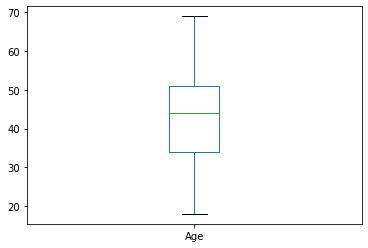

In [43]:
final_df["Age"].plot(kind="box")

In [44]:
final_df.sort_values(["Percentage"], ascending=False)

,Country_code,Country,Job Title,Age,Quantity,Percentage
1237,DE,Germany,No Job,23,27,0.32%
1236,DE,Germany,No Job,22,26,0.31%
1235,DE,Germany,No Job,21,26,0.31%
2733,FR,France,No Job,24,25,0.3%
1234,DE,Germany,No Job,20,25,0.3%
...,...,...,...,...,...,...
1992,ES,Spain,Reference Data Expert,37,1,0.01%
1991,ES,Spain,Oracle Database Administrator (Oracle DBA),65,1,0.01%
1990,ES,Spain,Oracle Database Administrator (Oracle DBA),63,1,0.01%
1989,ES,Spain,Oracle Database Administrator (Oracle DBA),47,1,0.01%


In [45]:
df_merged

,Country_code,Country,Job Title,Age,Quantity
0,AT,Austria,No Job,65,f6e7ee00-deac-0133-4de8-0a81e8b09a82
1,AT,Austria,Automatic Data Processing Planner,61,54f0f1c0-dda1-0133-a559-0a81e8b09a82
2,AT,Austria,No Job,36,83127080-da3d-0133-c74f-0a81e8b09a82
3,AT,Austria,Data Coordinator,49,15626d40-db13-0133-ea5c-0a81e8b09a82
4,AT,Austria,Database Developer,45,24954a70-db98-0133-4a64-0a81e8b09a82
...,...,...,...,...,...
9644,SK,Slovakia,Data Warehouse Developer,41,7d1ac020-dcb4-0133-817a-0a81e8b09a82
9645,SK,Slovakia,Database Manager,57,39f989f0-db52-0133-8482-0a81e8b09a82
9646,SK,Slovakia,No Job,28,70ce4a90-d965-0133-f5e4-0a81e8b09a82
9647,SK,Slovakia,Data Officer,51,2896e440-db3c-0133-5b67-0a81e8b09a82


In [63]:
def export_by_country(final_df, country):
    list_countries = final_df["Country"].unique().tolist()
    if country in list_countries:
        final_df_by_country = final_df[final_df["Country"] == f'{country}']
        print("exporting final csv by country")
        final_df_by_country.to_csv(f'../results/data_{country}.csv', index=False)
        return final_df_by_country

In [64]:
export_by_country(final_df, 'Austria')

exporting final csv by country


,Country_code,Country,Job Title,Age,Quantity,Percentage
0,AT,Austria,Automatic Data Processing Customer Liaison (AD...,35,1,0.01%
1,AT,Austria,Automatic Data Processing Customer Liaison (AD...,44,1,0.01%
2,AT,Austria,Automatic Data Processing Planner,52,1,0.01%
3,AT,Austria,Automatic Data Processing Planner,61,1,0.01%
4,AT,Austria,Automatic Data Processing Systems Security Spe...,31,1,0.01%
...,...,...,...,...,...,...
102,AT,Austria,No Job,55,1,0.01%
103,AT,Austria,No Job,56,1,0.01%
104,AT,Austria,No Job,62,1,0.01%
105,AT,Austria,No Job,65,1,0.01%


In [65]:
export_by_country(final_df, 'Germany')

exporting final csv by country


,Country_code,Country,Job Title,Age,Quantity,Percentage
534,DE,Germany,Automatic Data Processing Customer Liaison (AD...,26,1,0.01%
535,DE,Germany,Automatic Data Processing Customer Liaison (AD...,27,2,0.02%
536,DE,Germany,Automatic Data Processing Customer Liaison (AD...,31,1,0.01%
537,DE,Germany,Automatic Data Processing Customer Liaison (AD...,44,1,0.01%
538,DE,Germany,Automatic Data Processing Customer Liaison (AD...,47,1,0.01%
...,...,...,...,...,...,...
1307,DE,Germany,Survey Data Technician,47,1,0.01%
1308,DE,Germany,Voice and Data Technician,24,1,0.01%
1309,DE,Germany,Voice and Data Technician,26,1,0.01%
1310,DE,Germany,Voice and Data Technician,34,1,0.01%
